# Movie Recommendation - Data Exploration

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

### Ratings Dataset

                                u.data
          The full u data set, 100000 ratings by 943 users on 1682 items.
          Each user has rated at least 20 movies.  Users and items are
          numbered consecutively from 1.The data is randomly
          ordered. This is a tab separated list of 
          user id | item id | rating | timestamp. 
          The time stamps are unix seconds since 1/1/1970 UTC   

In [2]:
r_cols = ["user_id", "movie_id", "rating", "unix_timestamp"]
ratings = pd.read_csv("data/ml-100k/u.data", names=r_cols, sep="\t", encoding="latin-1")
ratings.head()

user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596

### User Dataset

                                u.user      
              Demographic information about the users; this is a tab
              separated list of
              user id | age | gender | occupation | zip code
              The user ids are the ones used in the u.data data set.

In [3]:
u_cols = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_csv("data/ml-100k/u.user", sep="|", names=u_cols, encoding="latin-1")
users.head()

user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

## Items Dataset

                                        u.item
              Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.

In [4]:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

items = pd.read_csv('data/ml-100k/u.item', sep='|', names=i_cols,
encoding='latin-1')
items.head()

movie id        movie title release date  video release date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1           1  ...        0          0       0        0   
1          1          0           0  ...        0          0       0        0   
2          0          0           0  ...        0          0       0        0   
3          0          0           0  ...        0          0       0        0   
4          0          0           0  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0        0  
1        0        0       0         1    0        0  
2        0        0       0         1    0        0  
3        0        0       0         0    0        0  
4        0        0       0         1    0        0  

[5 rows x 24 columns]

In [25]:
# Remove space in columns
items.columns = items.columns.str.replace(" ", "_")
items.columns = items.columns.str.replace("'", "")

# Data Exploration

Let's ensure that the number of ratings per user is atleast 20

In [26]:
user_numrat = ratings.groupby('user_id').size()
user_numrat

user_id
1      272
2       62
3       54
4       24
5      175
      ... 
939     49
940    107
941     22
942     79
943    168
Length: 943, dtype: int64

In [27]:
(user_numrat >= 20).all()

True

In [28]:
item_numrat = ratings.groupby('movie_id').size()
item_numrat

movie_id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Length: 1682, dtype: int64

In [29]:
(item_numrat < 20).sum()

743

In [ ]:
item_numrat.index

In [36]:
item_names = items.set_index('movie_id').loc[item_numrat.index, :].movie_title
item_names

movie_id
1                                Toy Story (1995)
2                                GoldenEye (1995)
3                               Four Rooms (1995)
4                               Get Shorty (1995)
5                                  Copycat (1995)
                          ...                    
1678                            Mat' i syn (1997)
1679                             B. Monkey (1998)
1680                         Sliding Doors (1998)
1681                          You So Crazy (1994)
1682    Scream of Stone (Schrei aus Stein) (1991)
Name: movie_title, Length: 1682, dtype: object

In [47]:
# Strip years from the title
item_names = item_names.str.replace(r'[\(\d\)]', '')
item_names = item_names.str.strip()

In [48]:
item_numrat.index = item_names
item_numrat

movie_title
Toy Story                           452
GoldenEye                           131
Four Rooms                           90
Get Shorty                          209
Copycat                              86
                                   ... 
Mat' i syn                            1
B. Monkey                             1
Sliding Doors                         1
You So Crazy                          1
Scream of Stone Schrei aus Stein      1
Length: 1682, dtype: int64

## Let's visualise the most frequently rated movies as a wordcloud

Text(0.5, 1.0, 'Movies which recieved the most number of ratings')

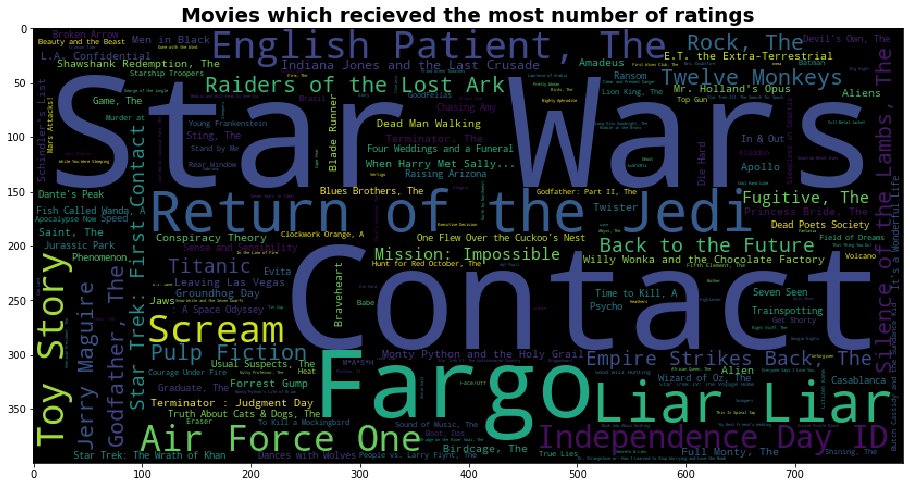

In [52]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS, width=800, height=400).generate_from_frequencies(item_numrat)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud);
plt.title('Movies which recieved the most number of ratings', fontsize=20, fontweight='bold')

## IMDB Top 250 criteria

How do you calculate the rank of movies and TV shows on the Top Rated Movies and Top Rated TV Show lists?
The following formula is used to calculate the Top Rated 250 titles. This formula provides a true 'Bayesian estimate', which takes into account the number of votes each title has received, minimum votes required to be on the list, and the mean vote for all titles:

$WR = (\frac{v}{(v+m)}) × R + (\frac{m}{(v+m)}) × C$

Where:

$WR$ = weighted rating

$R$ = average for the movie (mean) = (rating)

$v$ = number of votes for the movie = (votes)

$m$ = minimum votes required to be listed in the Top Rated list (currently 25,000)

$C$ = the mean vote across the whole report

Please be aware that the Top Rated Movies Chart only includes theatrical features: shorts, TV movies, miniseries and documentaries are not included in the Top Rated Movies Chart. The Top Rated TV Shows Chart includes TV Series, but not TV episodes or Movies.

**Source:** [IMDB Ratings FAQ](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#calculatetop)

In [65]:
R = ratings.groupby('movie_id').rating.mean()
v = ratings.groupby('movie_id').size()
m = v.quantile(0.7)
C = ratings.rating.mean()

In [66]:
WR = (v/(v+m))*R + (m/(v+m))*C

In [73]:
WR.index = item_names
R.index = item_names

Text(0.5, 1.0, 'Most Popular highest rated movies')

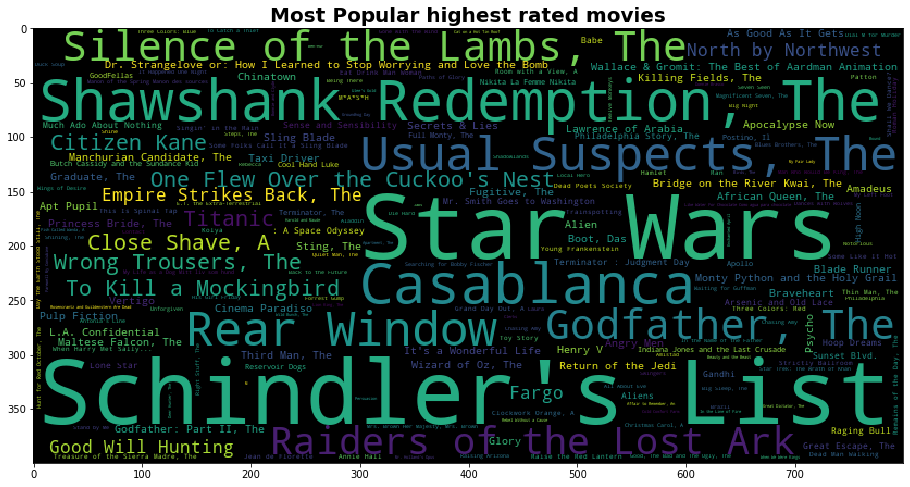

In [76]:
wordcloud = WordCloud(stopwords=STOPWORDS, width=800, height=400).generate_from_frequencies(WR)

plt.figure(figsize=(16, 8))

plt.imshow(wordcloud);
plt.title('Most Popular highest rated movies', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Highest rated movies')

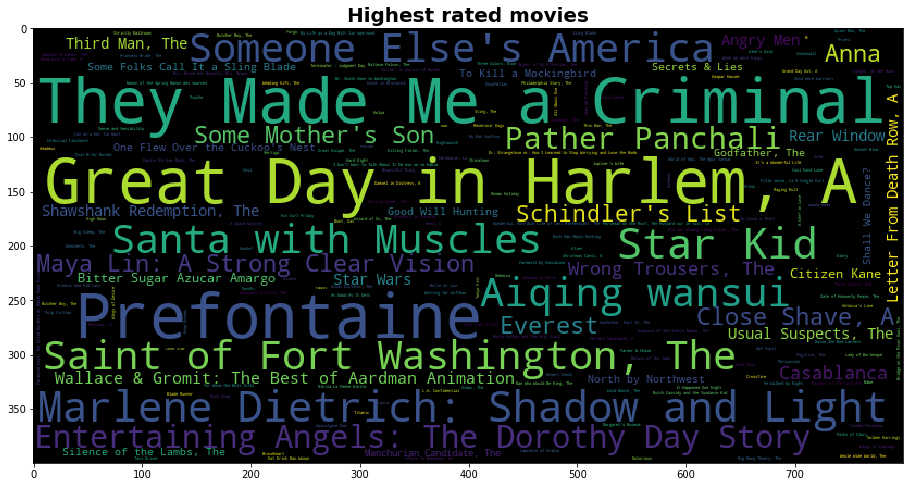

In [77]:
wordcloud = WordCloud(stopwords=STOPWORDS, width=800, height=400).generate_from_frequencies(R)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.title('Highest rated movies', fontsize=20, fontweight='bold')